In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

"""import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))"""

df=pd.read_csv("Ecommerce Customers")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [14]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [15]:
df.describe()


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [17]:
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

**Training and testing data**

In [19]:
from sklearn.model_selection import train_test_split as tts

In [20]:
x = df[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

In [21]:
xtrain, xtest, ytrain, ytest = tts(x,y,test_size=0.3,random_state=101)
xtest.head(1)


,Avg. Session Length,Time on App,Time on Website,Length of Membership
18,32.187812,14.715388,38.244115,1.516576


In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [23]:
modd = keras.Sequential()
modd.add(keras.layers.Dense(4,activation='relu'))
modd.add(keras.layers.Dense(4,activation='relu'))
modd.add(keras.layers.Dense(4,activation='relu'))

modd.add(keras.layers.Dense(1))

modd.compile(optimizer='rmsprop',loss='mse')


In [33]:
modd.fit(x=xtrain,y=ytrain, epochs=500)

Epoch 1/500
11/11 [==============================] - 0s 2ms/step - loss: 241580.7500
Epoch 2/500
11/11 [==============================] - 0s 2ms/step - loss: 241570.0625
Epoch 3/500
11/11 [==============================] - 0s 2ms/step - loss: 241559.4219
Epoch 4/500
11/11 [==============================] - 0s 2ms/step - loss: 241548.7031
Epoch 5/500
11/11 [==============================] - 0s 3ms/step - loss: 241538.0625
Epoch 6/500
11/11 [==============================] - 0s 2ms/step - loss: 241527.4062
Epoch 7/500
11/11 [==============================] - 0s 2ms/step - loss: 241516.7031
Epoch 8/500
11/11 [==============================] - 0s 2ms/step - loss: 241506.0625
Epoch 9/500
11/11 [==============================] - 0s 2ms/step - loss: 241495.3594
Epoch 10/500
11/11 [==============================] - 0s 2ms/step - loss: 241484.7031
Epoch 11/500
11/11 [==============================] - 0s 3ms/step - loss: 241474.0156
Epoch 12/500
11/11 [==============================] - 0s 3ms/st

<AxesSubplot:>

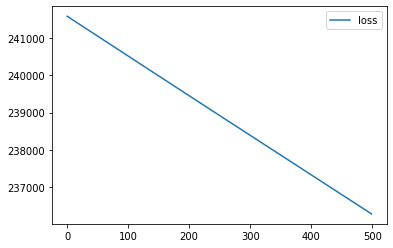

In [34]:
lossdf=pd.DataFrame(modd.history.history)
lossdf.plot()

In [35]:
modd.evaluate(xtest,ytest,verbose=0)

239573.96875

In [36]:
modd.evaluate(xtrain,ytrain,verbose=0)

236277.140625

In [37]:
test_preds = modd.predict(xtest)

In [38]:
test_predss = pd.Series(test_preds.reshape(150,))
pred_df = pd.DataFrame(ytest, columns=['Test true Y'])

In [39]:
pred_df

,Test true Y


In [41]:
print(tf.__version__)

2.6.0
